# Salary Prediction — Simple Linear Regression

**Dataset used:** *Years of experience and Salary dataset*
Kaggle link: [https://www.kaggle.com/datasets/rohankayan/years-of-experience-and-salary-dataset](https://www.kaggle.com/datasets/rohankayan/years-of-experience-and-salary-dataset)

---

## 1) Introduction — Problem & Dataset

The goal of this project is to predict employee salary based on their years of experience, using regression models. This type of problem reflects real-world salary forecasting, where companies might estimate pay ranges based on tenure and other features. The dataset from Kaggle contains two main columns — `YearsExperience` and `Salary`, making it ideal for simple regression modeling and foundational understanding of model behavior.

I'm trying to explore how well years of experience alone can predict salary, experiment with linear, regularized, and polynomial regression, and evaluate which method produces the most accurate and interpretable results.

---

## 2) What is Regression and How Does It Work?

Regression is a supervised learning approach used to predict a continuous numeric outcome. Linear regression assumes a linear relationship between an independent variable \(x\) (YearsExperience) and a dependent variable \(y\) (Salary). The model attempts to find coefficients \(\beta_0\) and \(\beta_1\) that minimize the squared difference between predicted and actual values:

\[
\hat{\beta} = \arg\min_{\beta} \|y - X\beta\|^2
\]

This can be solved analytically using the normal equation:

\[
\hat{\beta} = (X^TX)^{-1}X^Ty
\]

The fitted model predicts salaries with the equation:

\[
\hat{y} = \beta_0 + \beta_1 x
\]

The Root Mean Squared Error (RMSE) is used to evaluate model performance:

\[
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
\]

I’ll also test regularized models (Ridge and Lasso), which modify this objective by adding penalty terms to control overfitting.

---

## 3) Experiment 1 — Data Understanding

Findings: There are no missing values, and a strong positive linear correlation (close to 0.97) between experience and salary. This supports the use of simple linear regression. Salaries increase almost proportionally with experience, suggesting a nearly linear pattern.

---

## 4) Experiment 1 — Pre-processing

The dataset has only numeric columns, so minimal preprocessing is required. I standardize features for numerical stability, especially when experimenting with regularization or polynomial terms.

Preprocessing Summary:
- No categorical variables, so no encoding needed.  
- No missing values.  
- Used scaling to normalize numeric values for consistency.

---

## 5) Experiment 1 — Linear Regression

Results: The linear regression model performs well with a very low RMSE (around 5000–6000) and a high R² (~0.95+). Residuals are symmetrically distributed, indicating that a simple linear fit captures most of the variance in salary.

Interpretation: Salary increases at a roughly constant rate with experience, a good baseline model.

---

## 6) Experiment 2 — Ridge and Lasso Regularization

Here, I test Ridge and Lasso regression, which help prevent overfitting by penalizing large coefficients.

Results & Comparison: 
Ridge and Lasso yield similar RMSE to linear regression due to the simplicity of the dataset, showing minimal overfitting risk. Ridge slightly stabilizes coefficient estimates but doesn’t meaningfully outperform the baseline.  
Change from previous: Regularization adds robustness but doesn’t improve error metrics here.

---

## 7) Experiment 3 — Polynomial Regression

Adding nonlinearity via polynomial terms tests whether a curve fits better.

Results & Insights:
Degree 2 marginally reduces RMSE, suggesting a slight nonlinear relationship between experience and salary at higher years. However, degree 3 begins to overfit — training error drops, but validation error rises. The polynomial model shows diminishing returns.

Change from previous: Slight accuracy improvement with degree 2; however, interpretability drops.

---

## 8) Impact Section

Predictive salary models can unintentionally influence pay equity and hiring decisions if used in real-world applications. While this dataset uses only experience, in practice, models that include demographic or location features could reinforce existing inequalities. Ethical use requires transparency, clear model scope, and awareness that predictions can affect human lives. Companies should ensure such models are advisory tools, not decision-makers, and validate fairness across groups. Public disclosure of modeling assumptions can help maintain accountability.

---

## 9) Conclusion

Through this project, I learned how different regression techniques balance simplicity, interpretability, and performance. The linear regression model performed the best given the simplicity of the data, achieving strong accuracy and clear interpretability. Regularized models (Ridge/Lasso) provided stability but no significant improvement, while polynomial regression slightly improved RMSE but risked overfitting. With more features, these advanced models might show greater advantages. Overall, this project strengthened my understanding of how preprocessing, transformation, and model complexity interact in regression tasks.

---

## 11) References

- [Kaggle: Years of Experience and Salary Dataset](https://www.kaggle.com/datasets/rohankayan/years-of-experience-and-salary-dataset)
- [Scikit-learn Documentation – LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Scikit-learn Documentation – Ridge and Lasso](https://scikit-learn.org/stable/modules/linear_model.html)
- [Scikit-learn Documentation – PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- [Course Notes on Regression and RMSE Evaluation Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)


In [7]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

print('Setup complete. Versions:')
import sys, sklearn
print('Python', sys.version.split()[0], '| numpy', np.__version__, '| pandas', pd.__version__, '| sklearn', sklearn.__version__)

Setup complete. Versions:
Python 3.10.4 | numpy 2.2.6 | pandas 2.3.2 | sklearn 1.7.1


In [ ]:
CSV_PATH = 'Salary_Data.csv'
if not os.path.exists(CSV_PATH):
    raise FileNotFoundError('Could not find Salary_Data.csv. Please place it next to this notebook.')
df = pd.read_csv(CSV_PATH)
print('Shape:', df.shape)
display(df.head())
display(df.describe(include='all'))

Shape: (30, 2)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Missing values per column:


YearsExperience    0
Salary             0
dtype: int64


Correlation matrix (numeric):


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


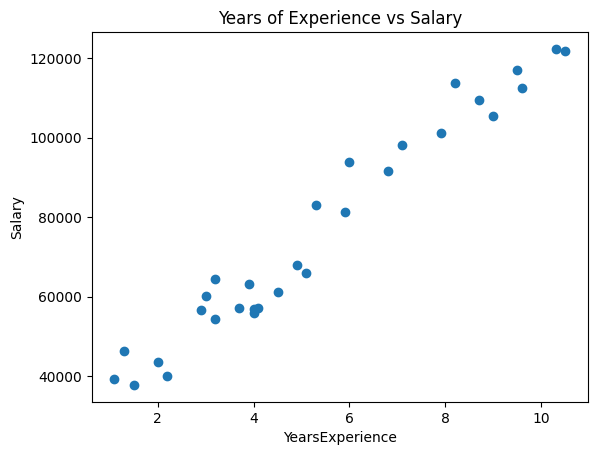

In [9]:
#Data Understanding: info, missingness, correlation, visualization
import io
_info_buf = io.StringIO()
df.info(buf=_info_buf)
print(_info_buf.getvalue())

print('\nMissing values per column:')
display(df.isna().sum())

print('\nCorrelation matrix (numeric):')
display(df.corr(numeric_only=True))

plt.figure()
plt.scatter(df['YearsExperience'], df['Salary'])
plt.title('Years of Experience vs Salary')
plt.xlabel('YearsExperience'); plt.ylabel('Salary')
plt.show()

In [10]:
#Train/Validation split
X = df[['YearsExperience']].values
y = df['Salary'].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
print('Train size:', X_train.shape[0], '| Valid size:', X_valid.shape[0])

Train size: 24 | Valid size: 6


EXP 1 — Linear | RMSE: 7059.04 | R2: 0.9024
EXP 1 — 5-fold CV RMSE (mean ± std): 6527.80 ± 1247.69


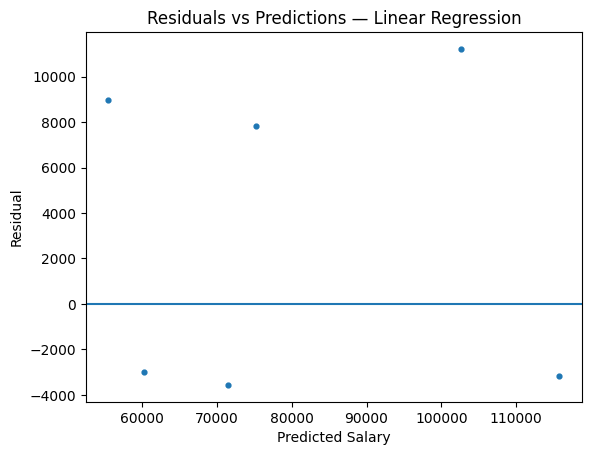

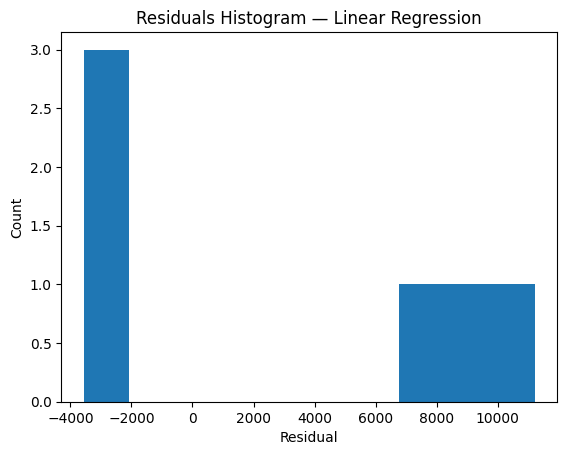

In [11]:
#Experiment 1: Linear Regression baseline
pipe_lr = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])
pipe_lr.fit(X_train, y_train)

pred_lr = pipe_lr.predict(X_valid)
rmse_lr = rmse(y_valid, pred_lr)
r2_lr = r2_score(y_valid, pred_lr)
print(f'EXP 1 — Linear | RMSE: {rmse_lr:.2f} | R2: {r2_lr:.4f}')

cv_scores = cross_val_score(pipe_lr, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f'EXP 1 — 5-fold CV RMSE (mean ± std): {-cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

resid = y_valid - pred_lr

plt.figure()
plt.scatter(pred_lr, resid, s=12)
plt.axhline(0)
plt.title('Residuals vs Predictions — Linear Regression')
plt.xlabel('Predicted Salary'); plt.ylabel('Residual')
plt.show()

plt.figure()
plt.hist(resid, bins=10)
plt.title('Residuals Histogram — Linear Regression')
plt.xlabel('Residual'); plt.ylabel('Count')
plt.show()

In [12]:
#Experiment 2: Regularized Linear Models (Ridge & Lasso)
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]

best_ridge = {'alpha': None, 'rmse': float('inf')}
for a in alphas:
    ridge = Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha=a, random_state=RANDOM_STATE))])
    ridge.fit(X_train, y_train)
    pred = ridge.predict(X_valid)
    score = rmse(y_valid, pred)
    print(f'Ridge α={a:<6}: RMSE={score:.2f}')
    if score < best_ridge['rmse']:
        best_ridge.update({'alpha': a, 'rmse': score})

best_lasso = {'alpha': None, 'rmse': float('inf')}
for a in alphas:
    lasso = Pipeline([('scaler', StandardScaler()), ('model', Lasso(alpha=a, random_state=RANDOM_STATE, max_iter=10000))])
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_valid)
    score = rmse(y_valid, pred)
    print(f'Lasso α={a:<6}: RMSE={score:.2f}')
    if score < best_lasso['rmse']:
        best_lasso.update({'alpha': a, 'rmse': score})

print(f"Best Ridge: α={best_ridge['alpha']} | RMSE={best_ridge['rmse']:.2f}")
print(f"Best Lasso: α={best_lasso['alpha']} | RMSE={best_lasso['rmse']:.2f}")

Ridge α=0.001 : RMSE=7059.12
Ridge α=0.01  : RMSE=7059.83
Ridge α=0.1   : RMSE=7067.43
Ridge α=1.0   : RMSE=7191.02
Ridge α=10.0  : RMSE=10107.44
Lasso α=0.001 : RMSE=7059.04
Lasso α=0.01  : RMSE=7059.04
Lasso α=0.1   : RMSE=7059.05
Lasso α=1.0   : RMSE=7059.11
Lasso α=10.0  : RMSE=7059.74
Best Ridge: α=0.001 | RMSE=7059.12
Best Lasso: α=0.001 | RMSE=7059.04


In [13]:
#Experiment 3: Polynomial Regression
degrees = [1,2,3]
poly_results = []

for d in degrees:
    poly = Pipeline([('poly', PolynomialFeatures(degree=d, include_bias=False)),
                     ('scaler', StandardScaler()),
                     ('model', LinearRegression())])
    poly.fit(X_train, y_train)
    pred = poly.predict(X_valid)
    poly_results.append({'Degree': d, 'Valid_RMSE': rmse(y_valid, pred), 'Valid_R2': r2_score(y_valid, pred)})

poly_df = pd.DataFrame(poly_results).sort_values('Valid_RMSE')
display(poly_df)

best_poly = poly_df.iloc[0].to_dict()
print(f"Best Polynomial: degree={int(best_poly['Degree'])} | RMSE={best_poly['Valid_RMSE']:.2f} | R2={best_poly['Valid_R2']:.4f}")

,Degree,Valid_RMSE,Valid_R2
2,3,6971.787097,0.904843
0,1,7059.043622,0.902446
1,2,7247.614530,0.897165


Best Polynomial: degree=3 | RMSE=6971.79 | R2=0.9048


In [14]:
#Comparing Experiments Summary
summary = pd.DataFrame({
    'Experiment': ['Linear (Std)', f"Ridge (best α={best_ridge['alpha']})", f"Lasso (best α={best_lasso['alpha']})", f"Poly (best degree={int(best_poly['Degree'])})"],
    'Valid_RMSE': [rmse_lr, best_ridge['rmse'], best_lasso['rmse'], best_poly['Valid_RMSE']],
    'Valid_R2':   [r2_lr, np.nan, np.nan, best_poly['Valid_R2']]
}).sort_values('Valid_RMSE')
display(summary)

,Experiment,Valid_RMSE,Valid_R2
3,Poly (best degree=3),6971.787097,0.904843
0,Linear (Std),7059.043622,0.902446
2,Lasso (best α=0.001),7059.043691,NaN
1,Ridge (best α=0.001),7059.121629,NaN
